# Google Colab Setup

# Text classification :: Spam detection


## Task 

We want to build a Spam detector which, given examples of spam emails (e.g. flagged by users) and examples of regular (non-spam, also called "ham") emails, learns how to flag new unseen emails as spam or non-spam.

## Data

We will use the [SpamAssassin](https://spamassassin.apache.org/) public email corpus$^*$. This dataset contains ~6'000 labeled emails with a ~30% spam ratio. If you want to learn more about this dataset, check [this](https://spamassassin.apache.org/old/publiccorpus/).  

The dataset has been downloaded for you and is available in the *data* folder.

## Summary

1. Load the data
2. Text preprocessing
3. Data exploration
4. Feature extraction
5. Build a spam detector
6. What did our model learn? Error analysis

$^*$ *Datasets of text are called corpora and samples are called documents.*

## 1. The data

In [1]:
# Load libraries and helper functions

import tools

In [2]:
# Load the data

df = tools.load_data()

Data loaded.
Data size: (5832, 2)


Let's have a look at a few rows from the dataset.

***Note:*** *label* is 0 for *non-spam* and 1 for *spam*.

In [3]:
df.sample(3)

,label,text
4648,0,"Linux: the film. http://www.revolution-os.com/ (trailer + first 8 mins online) I wonder if this will ever get to Ireland? Otherwise, I wonder if it would be possible to get the Trinity Internet Society or somewhere to show it? Justin -- Irish Linux Users' Group: ilug@linux.ie http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information. List maintainer: listmaster@linux.ie"
4027,0,"URL: http://boingboing.net/#85528842 Date: Not supplied [IMG: http://www.craphound.com/images/bluelady.jpg] Stan Jones isn't the only person to have turned himself blue with quack silver remedies. ""Rosemary"" took silver supplements in the 50s for her allergies and put up this site in 1998 to warn others off of the horror of blue skin for life. Link[1] Discuss[2] (_ Thanks, Stefan!_) [1] http://together.net/~rjstan/rose1.html [2] http://www.quicktopic.com/boing/H/tCar7pZ5ypi"
3672,0,"Is there a way to tell spamassassin to put the results at the bottom of the message instead? If not, what is the easiest way to do this. I found a report_header, but no equivalent report_bottom. Thanks, Jon. jon.g@directfreight.com ------------------------------------------------------- This sf.net email is sponsored by: Jabber - The world's fastest growing real-time communications platform! Don't just IM. Build it in! http://www.jabber.com/osdn/xim _______________________________________________ Spamassassin-talk mailing list Spamassassin-talk@lists.sourceforge.net https://lists.sourceforge.net/lists/listinfo/spamassassin-talk"


Now, let's check the number of samples per class in the data.

Samples per class (%):
non-spam    70.3
spam        29.7
Name: label, dtype: float64




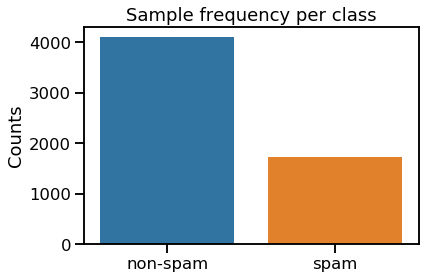

In [4]:
tools.plot_class_frequency(df)

## 2. Text preprocessing

Good text preprocessing is an essential part of every NLP project!

Our goal here is to build a model that distinguishes non-spam from spam. The idea here is to "clean" and "standardize" raw text before feeding it to our machine learning model. We need to keep as many "informative" words as possible, while discarding the "uniformative" ones. Removing unnecessary content, i.e. the "noise", from our texts will help to improve the accuracy of our models.

**Take a few minutes to look at the raw text. What do you think should be removed from the text?**

Below are a few pointers:

* HTML tags 
* URLs
* E-mail addresses
* Punctuation marks, digits (e.g. 2002, 1.1, ...)
* Multiple whitespace
* Case conversion (e.g. Dog vs dog, ...)
* English STOPWORDS (e.g. a, is, my, i, all, and, by...)
* ...

The *clean_corpus* function below takes care of all of that!

In [5]:
df = tools.clean_corpus(df)

print('Data cleaned.')

Data cleaned.


Let's have a look at a few "cleaned" examples.

In [13]:
tools.show_clean_text(df)


Original document:

4760    Key concepts: Nakamichi Yamasaki, hydrocarbon generation, carbon dioxide, industrial chemistry Attention Conservation Notice: Yet another weird Nipponese scheme, about some miracle gizmo that runs on pollution Links: Tornados in Britain? Maybe it really is the 51st State. http://www.thesun.co.uk/article/0,,2-2002362050,00.html Newfangled suntan pill alleged to have peculiar side- effects. http://timesofindia.indiatimes.com/articleshow.asp?art_id=18672487 See all those really bright places? Well, that's where the Greenhouse comes from. http://www3.cosmiverse.com/news/earthobservatory/0802/images/land_ocean_ice_lights_080602_1bi g.jpg The West Nile plague has reached Austin. http://www.planetark.org/dailynewsstory.cfm/newsid/17239/story.htm --------------------------------------------------- Entries in the Global Civil Society Design Contest. From: Steven W. Schuldt <swschuldt*mac.com> http://www.americanrobotz.com/images2/Soon_GlobalCivilSocietyLaptop.jpg Fr

## 3. Data Exploration :: What makes spam distinct?

### 2.1 Frequent words

Which words distinguish spam from non-spam? Can we  identify the words in a text that are the most informative about its topic?

Let's find the most frequent words in spam and non-spam.

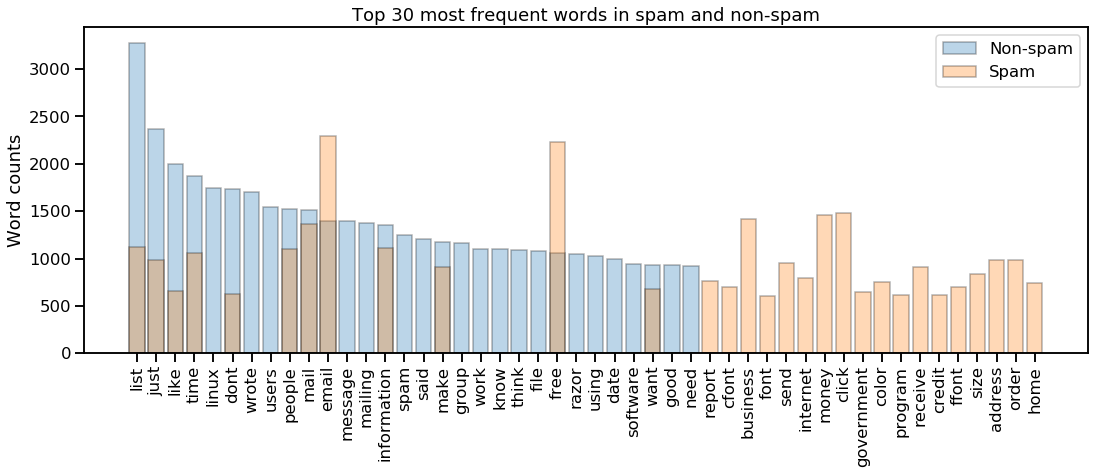

In [7]:
tools.plot_most_common_words(df=df, N=30)

**Frequent "spammish" words**: 

* click
* money
* business
* free
* email
* ...

**Frequent "non-spammish" words**:
* list
* linux
* message
* wrote
* users
* spam
* said
* file
* good
* ...

### 2.2 What about "spammish" signatures?

* Do spams contain more HTML tags? 
* Does non-spam contain more URLs and E-mail adresses? 
* Are spams mails longer than non-spam? 
* ...

Let's find out!

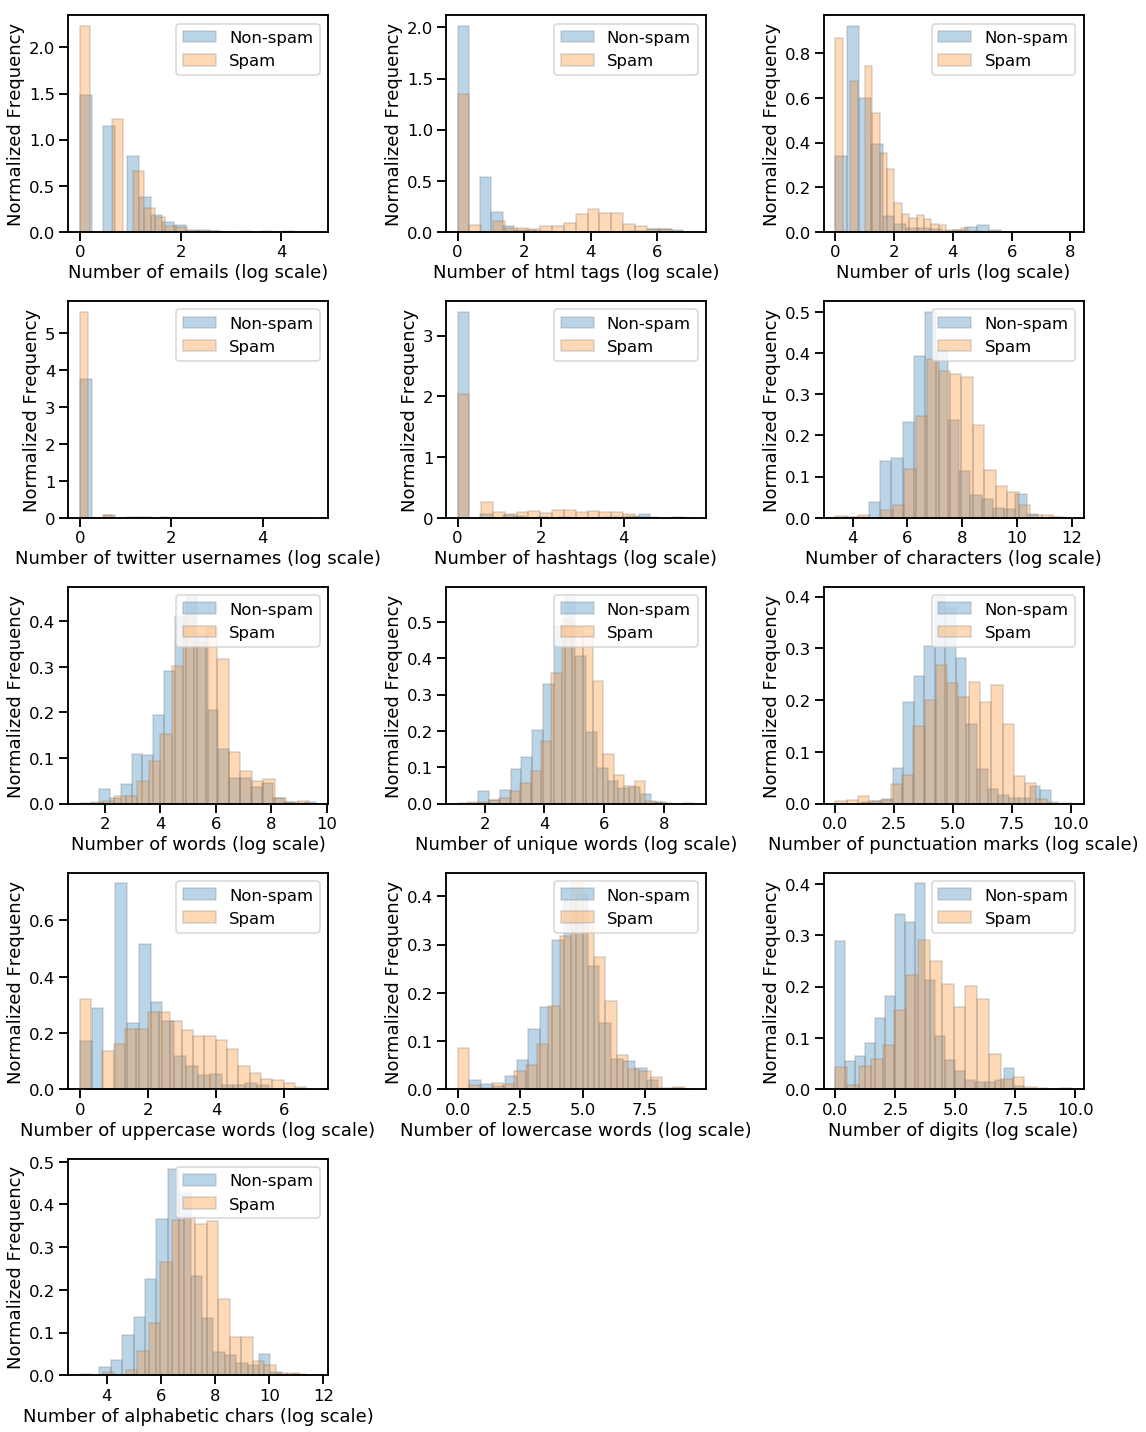

In [8]:
features = tools.get_features(df=df)

## 3. Feature engineering :: Extracting features from text

Computers don't understand natural language. So, how do we represent text?

One of the simplest but effective and commonly used models to represent text for machine learning is the ***Bag of Words*** model ([online documentation](https://en.wikipedia.org/wiki/Bag-of-words_model)). When using this model, we discard most of the structure of the input text (word order, chapters, paragraphs, sentences and formating) and only count how often each word appears in each text. Discarding the structure and counting only word occurencies leads to the mental image of representing text as a "bag".  

**Example:** Let our toy corpus contain just four documents.

In [9]:
tools.show_bag_of_words_vector()

,captain,deep,enjoy,i,learning,like,my,nlp,o,paragliding
Text,,,,,,,,,,
I enjoy paragliding.,0,0,1,1,0,0,0,0,0,1
I like NLP.,0,0,0,1,0,1,0,1,0,0
I like deep learning.,0,1,0,1,1,1,0,0,0,0
O Captain! my Captain!,2,0,0,0,0,0,1,0,1,0


Bag of Words has converted all documents into numeric vectors. Each column represents a word from the corpus and each row one of the four documents. The value in each cell represents the number of times that word appears in a specific document. For example, the fourth document has the word `captain` occuring twice and the words `my` and `O` occuring once.

## 4. Build a spam detector

In the previous section, we saw how to perform text preprocessing and feature extraction from text. We are now ready to build our machine learning model for detecting spams. We will use a Logistic Regression classifier ([online documentation](https://en.wikipedia.org/wiki/Logistic_regression)).

First, we need to split the data into two sets: the `train` set and the `test` set. We will then use the train set to `fit` our model. The test set will be used to `evaluate` the performance of our model. 

### 4.1 Spam classification

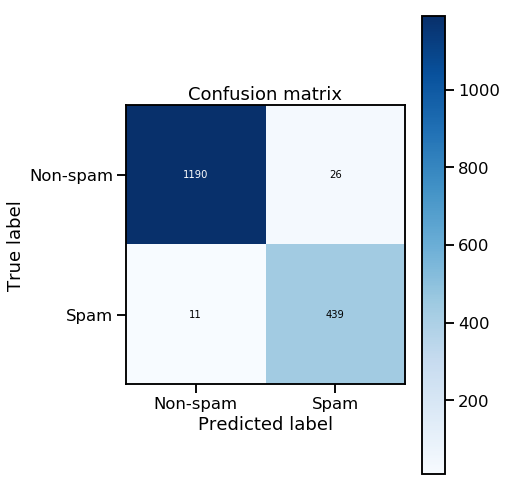

In [10]:
# Train/test splitting
# --------------------
df_train, df_test = tools.train_test_split_(df)

# Fit model on the train data
# ---------------------------
model = tools.fit_model(df_train)

# Print results
# -------------
tools.plot_confusion_matrix(df_test,model);

**Confusion matrices**  

Confusion matrices are a nice way of evaluating the performance of models for classification models. Rows correspond to the true classes and the columns to the predicted classes. Entries on the main diagonal of the confusion matrix correspond to correct predictions while the other cells tell us how many mistakes made our model ([online documentation]((https://en.wikipedia.org/wiki/Confusion_matrix))).

* The first row represents non-spam mails: 1'190 were correctly classified as 'non-spam', while 26 (~2%) were misclassified as 'spam'.
* The second row represents spam mails: 439 were correctly classified as 'spam', while 11  (~2,4%) were misclassified as 'non-spam'.

Our model did quite well!

### 4.2 What did our model learn from the data?

Our logistic regression model has learned which words are the most indicative of non-spam and which words are the most indicative of spam. The positive coefficients on the right correspond to words that, according to the model, are indicative of spam. The negative coefficients on the left correspond to words that, according to the model, are indicative of non-spam.

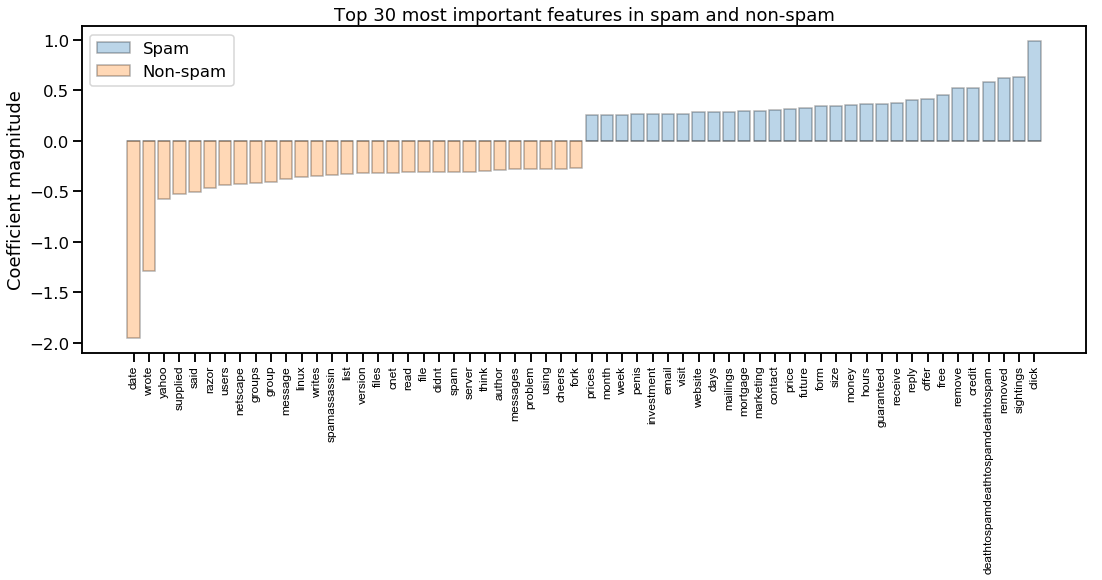

In [11]:
tools.visualize_coefficients(model, n_top_features=30)

According to the model, words such as "date", "wrote", "yahoo", "said", "linux", "author", ... are strong indicators of non-spam.  

Words such as "click", "credit", "remove", "free", "offer", "money" ... indicate spam. 

### 4.3 Error analysis :: Where does our model fail?

We will now analyze the misclassified mails in order to get some insights on where the model failed to make correct predictions. The *error_analysis* function below will show us the top features responsible for the model making a decision of prediction whether the mail is spam or non-spam.

In [ ]:
tools.error_analysis(df_test,model,doc_nbr=14)